Joshua Meuleman

Datum 18/11/2025

A*-Algoritme

In [1]:
# Installeer vereiste pakketten als ze ontbreken (networkx, matplotlib)
import importlib, subprocess, sys
def ensure(pkg):
    try:
        importlib.import_module(pkg)
    except Exception:
        print(f'Installing {pkg}...')
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg])

ensure('networkx')
ensure('matplotlib')

# imports after install
import networkx as nx
import matplotlib.pyplot as plt

Installing networkx...
Installing matplotlib...
Installing matplotlib...


In [2]:
# A* implementatie (helder en iets verbeterd t.o.v. de originele voorbeeldcode)
import math
from typing import Dict, Tuple, List, Callable, Optional

class Graph:
    def __init__(self, adjacency_list: Dict[str, List[Tuple[str, float]]], heuristic: Optional[Dict[str, float]] = None):
        self.adjacency_list = adjacency_list
        # heuristic kan als dict meegegeven worden; default: zeros
        self.heuristic = heuristic or {n: 0 for n in adjacency_list}

    def get_neighbors(self, v: str) -> List[Tuple[str, float]]:
        return self.adjacency_list.get(v, [])

    def h(self, n: str) -> float:
        return self.heuristic.get(n, 0)

    def a_star_algorithm(self, start_node: str, stop_node: str) -> Optional[List[str]]:
        # g: cost from start to node
        g: Dict[str, float] = {start_node: 0}
        # f = g + h
        f: Dict[str, float] = {start_node: self.h(start_node)}
        # open set (nodes to evaluate)
        open_set = set([start_node])
        # parent pointers to reconstruct path
        parents: Dict[str, str] = {start_node: start_node}

        while open_set:
            # pick node in open_set with lowest f value
            current = min(open_set, key=lambda node: f.get(node, float('inf')))

            if current == stop_node:
                # reconstruct path
                path = []
                while parents[current] != current:
                    path.append(current)
                    current = parents[current]
                path.append(start_node)
                path.reverse()
                return path

            open_set.remove(current)

            for (neighbor, weight) in self.get_neighbors(current):
                tentative_g = g.get(current, float('inf')) + weight
                if tentative_g < g.get(neighbor, float('inf')):
                    # This path to neighbor is better than any previous one. Record it.
                    parents[neighbor] = current
                    g[neighbor] = tentative_g
                    f[neighbor] = tentative_g + self.h(neighbor)
                    if neighbor not in open_set:
                        open_set.add(neighbor)

        # No path found
        return None

In [3]:
# Voorbeeld graph zoals in de opdracht / website
adjacency_list = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)],
    'D': []
}
# gebruik dezelfde heuristische waarden als in het voorbeeld (gelijke waarden)
heuristic = {'A': 1, 'B': 1, 'C': 1, 'D': 1}

graph = Graph(adjacency_list, heuristic=heuristic)
path = graph.a_star_algorithm('A', 'D')
print('Gevonden pad:', path)

Gevonden pad: ['A', 'B', 'D']


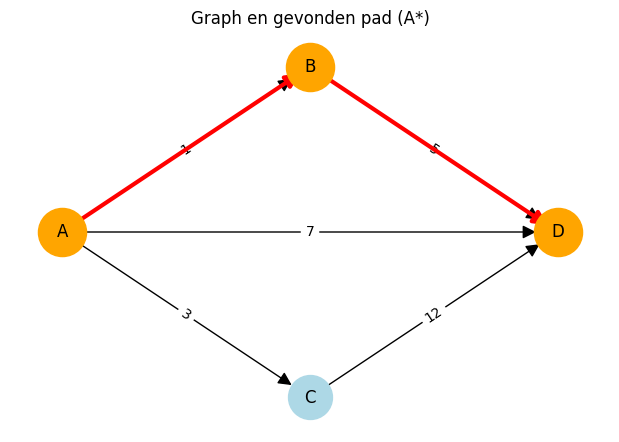

In [4]:
# Visualisatie met networkx en matplotlib
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
# Voeg knopen en gewogen kanten toe
for node, neighbors in adjacency_list.items():
    G.add_node(node)
    for (nbr, w) in neighbors:
        G.add_edge(node, nbr, weight=w)

# positie (hard-coded voor overzichtelijke layout)
pos = {'A': (0, 0), 'B': (1, 0.5), 'C': (1, -0.5), 'D': (2, 0)}

plt.figure(figsize=(6,4))
# teken alle knopen en randen normaal
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, arrowsize=20)
# teken kant labels (gewichten)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# highlight het gevonden pad (indien aanwezig)
if path:
    # maak lijst met edges in pad
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3, arrowsize=20)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange', node_size=1200)

plt.title('Graph en gevonden pad (A*)')
plt.axis('off')
plt.show()

In [5]:
# Eenvoudige verificatie (assert)
expected = ['A', 'B', 'D']
assert path == expected, f'Pad mismatch: verwacht {expected}, kreeg {path}'
print('Verificatie geslaagd: gevonden pad komt overeen met verwachting.')

Verificatie geslaagd: gevonden pad komt overeen met verwachting.


## Gebruiksaanwijzing

- Open dit bestand in Jupyter Notebook / JupyterLab: `JoshuaMeuleman_Astar/Astar.ipynb`.
- Als je in PowerShell werkt en de virtuele omgeving geactiveerd hebt, run: (in project root)

```powershell
python -m pip install jupyterlab
jupyter lab
```

- Of start `jupyter notebook` en open het notebook.

Opmerking: het notebook probeert automatisch `networkx` en `matplotlib` te installeren als ze ontbreken.